In [5]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf

In [7]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [8]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [10]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [11]:
google_data.shape

(5016, 6)

In [12]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5.016000e+03
mean,45.150768,45.627669,44.701793,45.174887,45.124826,1.158300e+08
std,43.209281,43.689079,42.792340,43.250783,43.205736,1.498290e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.029225,13.141866,12.878416,13.025801,13.010995,2.736119e+07
50%,26.978466,27.189173,26.780938,26.989250,26.958572,5.627913e+07
75%,60.177377,60.612938,59.729575,60.258501,60.190008,1.425744e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [13]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5016 entries, 2004-08-19 to 2024-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5016 non-null   float64
 1   High       5016 non-null   float64
 2   Low        5016 non-null   float64
 3   Close      5016 non-null   float64
 4   Adj Close  5016 non-null   float64
 5   Volume     5016 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.3 KB


In [14]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

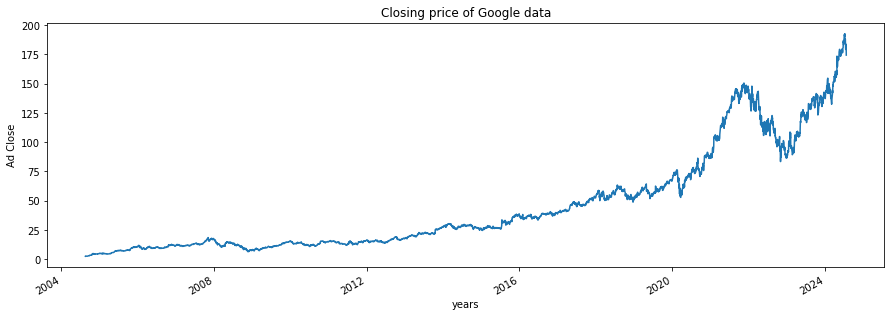

In [16]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Ad Close")
plt.title("Closing price of Google data")

In [17]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [18]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

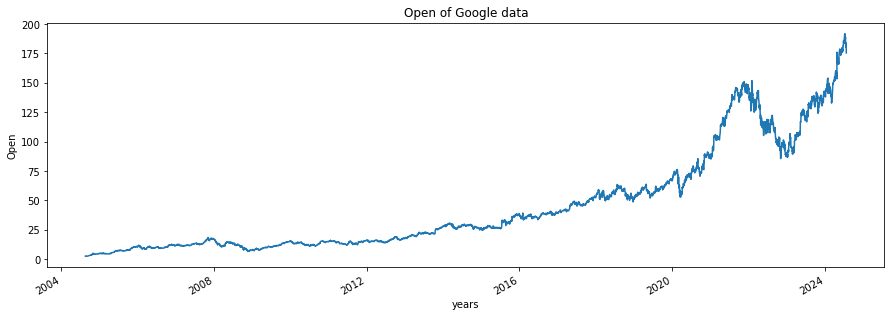

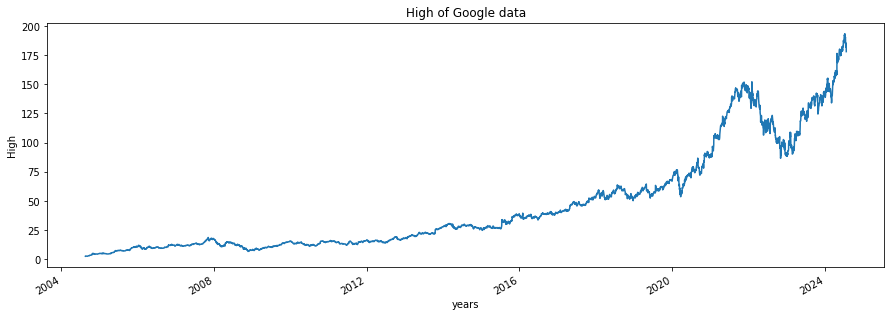

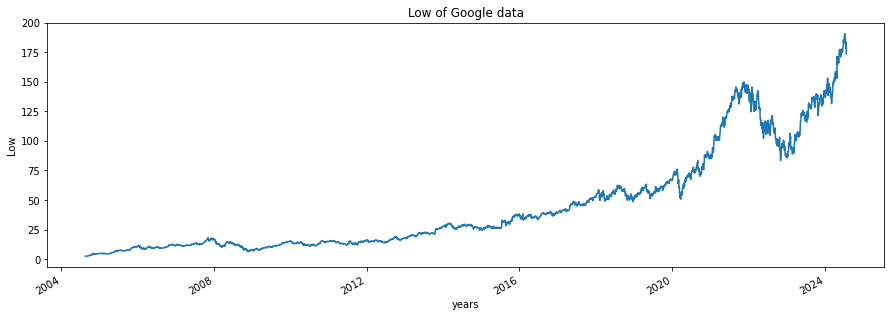

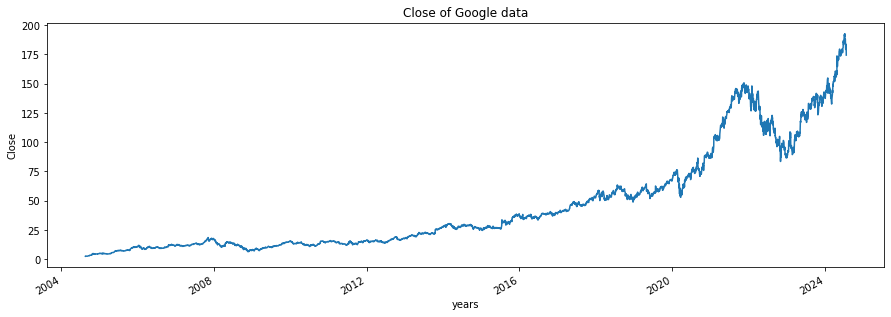

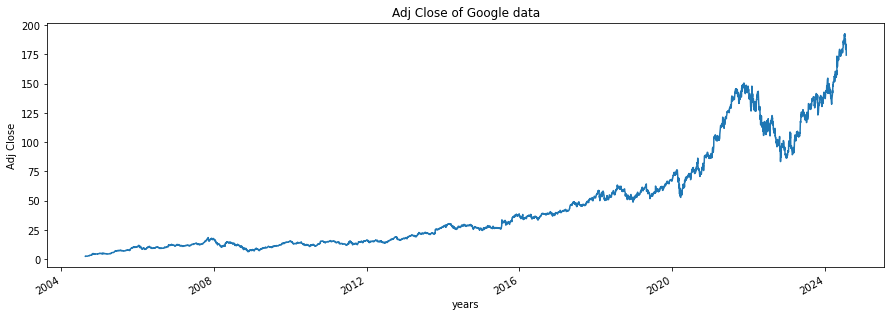

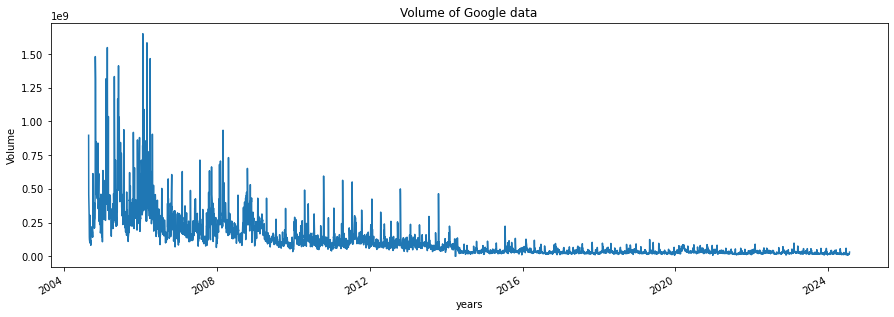

In [19]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [20]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80


In [21]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [22]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [23]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [24]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 141


In [25]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [26]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

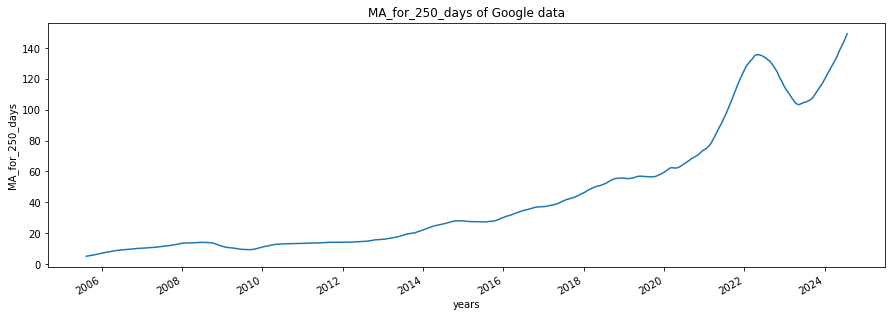

In [27]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 432x288 with 0 Axes>

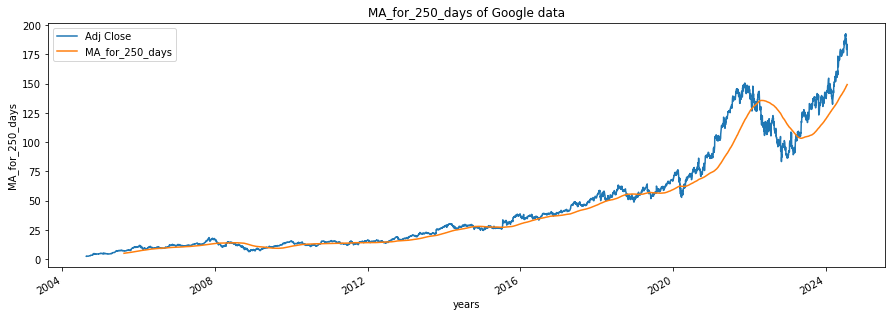

In [28]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 432x288 with 0 Axes>

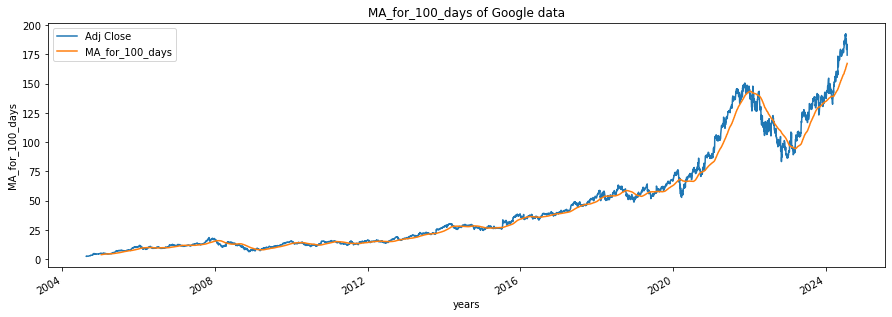

In [29]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 432x288 with 0 Axes>

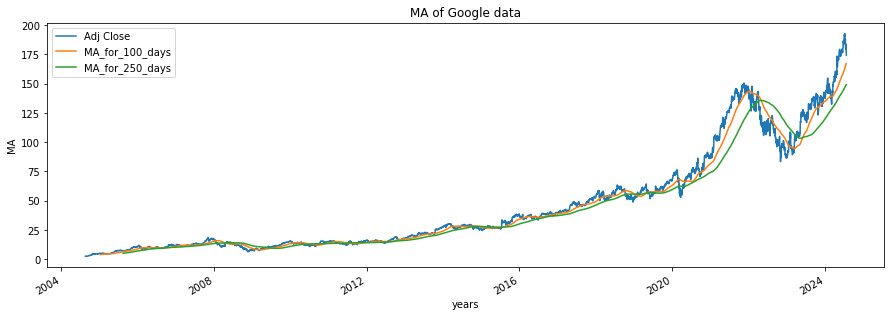

In [30]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [31]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


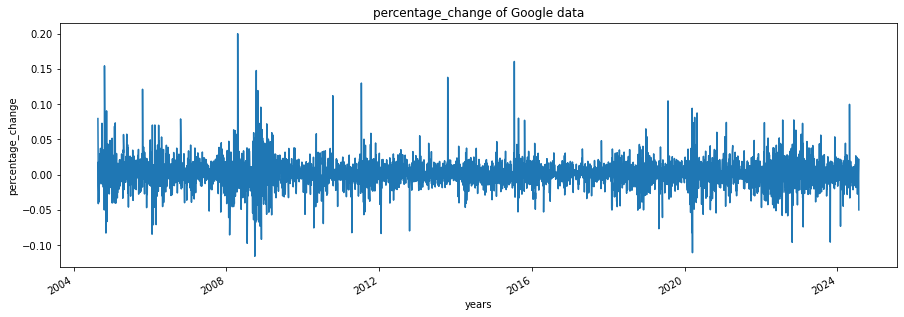

In [32]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [33]:
Adj_close_price = google_data[['Adj Close']]

In [34]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.66000366]), array([2.48808169]))

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [9.51044311e-01],
       [9.52358910e-01],
       [9.03823822e-01]])

In [36]:
len(scaled_data)

5016

In [37]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [38]:
x_data[0],y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

In [39]:
int(len(x_data)*0.7)

3441

In [40]:
4908-100-int(len(x_data)*0.7)

1367

In [41]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3441, 100, 1)
(3441, 1)
(1475, 100, 1)
(1475, 1)


In [43]:
pip install tensorflow  


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [50]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - loss: 3.1400e-04
Epoch 2/2
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - loss: 6.6540e-05


In [53]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [54]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [55]:
predictions

array([[0.28660747],
       [0.2860019 ],
       [0.28664622],
       ...,
       [0.8255122 ],
       [0.83066136],
       [0.8355613 ]], dtype=float32)

In [56]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.99278 ],
       [ 56.877613],
       [ 57.000145],
       ...,
       [159.47733 ],
       [160.45654 ],
       [161.38838 ]], dtype=float32)

In [57]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.07491302],
       [ 58.6996994 ],
       [ 58.55986023],
       ...,
       [183.3500061 ],
       [183.6000061 ],
       [174.36999512]])

In [58]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [59]:
rmse

8.68792582360397

In [60]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-09-12,58.074913,56.992779
2018-09-13,58.699699,56.877613
2018-09-14,58.559860,57.000145
2018-09-17,57.736801,57.045815
2018-09-18,57.995007,56.717766


<Figure size 432x288 with 0 Axes>

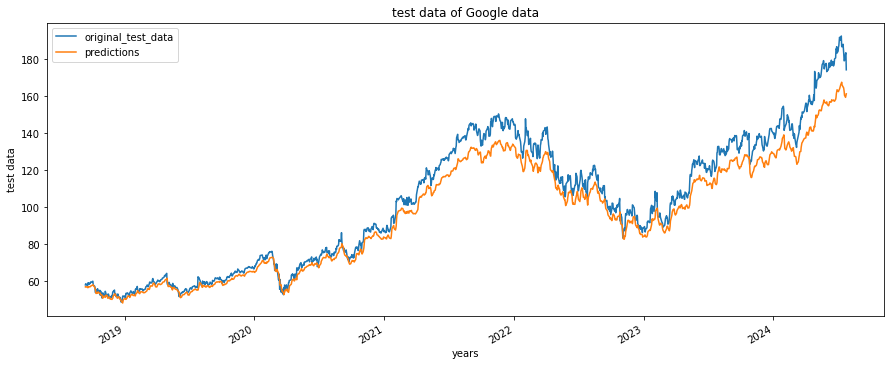

In [61]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 432x288 with 0 Axes>

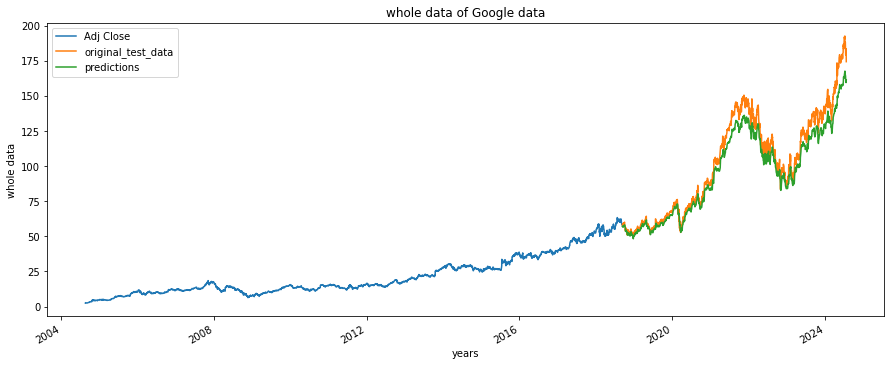

In [62]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [63]:
model.save("Latest_stock_price_model.keras")